In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


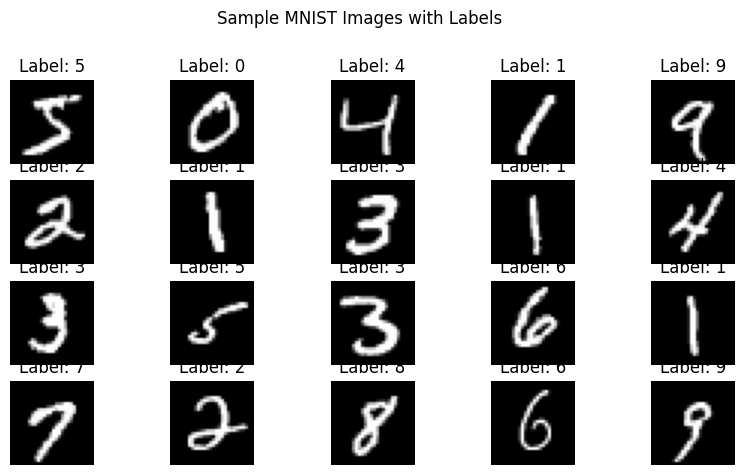

In [4]:
# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.show()

In [5]:
l1_model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,),
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),

    layers.Dense(10, activation='softmax')
])

l2_model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),

    layers.Dense(10, activation='softmax')
])

l1_l2_model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,),
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
l1_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = l1_model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=256,
                    validation_data=(test_images, test_labels),
                    verbose=2)

test_loss, test_acc = l1_model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/15
235/235 - 17s - 72ms/step - accuracy: 0.8704 - loss: 15.3116 - val_accuracy: 0.0974 - val_loss: 5.6489
Epoch 2/15
235/235 - 1s - 4ms/step - accuracy: 0.9036 - loss: 2.4458 - val_accuracy: 0.8585 - val_loss: 2.4235
Epoch 3/15
235/235 - 1s - 6ms/step - accuracy: 0.9105 - loss: 1.6967 - val_accuracy: 0.9228 - val_loss: 1.5732
Epoch 4/15
235/235 - 1s - 5ms/step - accuracy: 0.9138 - loss: 1.5136 - val_accuracy: 0.9401 - val_loss: 1.3733
Epoch 5/15
235/235 - 1s - 5ms/step - accuracy: 0.9183 - loss: 1.3964 - val_accuracy: 0.9349 - val_loss: 1.2465
Epoch 6/15
235/235 - 1s - 6ms/step - accuracy: 0.9174 - loss: 1.3049 - val_accuracy: 0.9401 - val_loss: 1.2040
Epoch 7/15
235/235 - 2s - 9ms/step - accuracy: 0.9230 - loss: 1.2145 - val_accuracy: 0.9394 - val_loss: 1.1303
Epoch 8/15
235/235 - 1s - 5ms/step - accuracy: 0.9232 - loss: 1.1737 - val_accuracy: 0.9443 - val_loss: 1.0815
Epoch 9/15
235/235 - 1s - 5ms/step - accuracy: 0.9219 - loss: 1.1526 - val_accuracy: 0.9406 - val_loss: 1.025

In [7]:
l2_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = l2_model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=256,
                    validation_data=(test_images, test_labels),
                    verbose=2)

test_loss, test_acc = l2_model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/15
235/235 - 14s - 60ms/step - accuracy: 0.8903 - loss: 1.9585 - val_accuracy: 0.9044 - val_loss: 1.5323
Epoch 2/15
235/235 - 11s - 45ms/step - accuracy: 0.9550 - loss: 1.1015 - val_accuracy: 0.9642 - val_loss: 0.8405
Epoch 3/15
235/235 - 1s - 5ms/step - accuracy: 0.9593 - loss: 0.7170 - val_accuracy: 0.9654 - val_loss: 0.5831
Epoch 4/15
235/235 - 1s - 5ms/step - accuracy: 0.9611 - loss: 0.5293 - val_accuracy: 0.9675 - val_loss: 0.4529
Epoch 5/15
235/235 - 1s - 5ms/step - accuracy: 0.9604 - loss: 0.4425 - val_accuracy: 0.9685 - val_loss: 0.3943
Epoch 6/15
235/235 - 1s - 5ms/step - accuracy: 0.9611 - loss: 0.3974 - val_accuracy: 0.9619 - val_loss: 0.3821
Epoch 7/15
235/235 - 1s - 6ms/step - accuracy: 0.9629 - loss: 0.3714 - val_accuracy: 0.9645 - val_loss: 0.3534
Epoch 8/15
235/235 - 1s - 6ms/step - accuracy: 0.9620 - loss: 0.3556 - val_accuracy: 0.9677 - val_loss: 0.3345
Epoch 9/15
235/235 - 1s - 6ms/step - accuracy: 0.9631 - loss: 0.3482 - val_accuracy: 0.9675 - val_loss: 0.33

In [8]:
l1_l2_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = l1_l2_model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=256,
                    validation_data=(test_images, test_labels),
                    verbose=2)

test_loss, test_acc = l1_l2_model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/15
235/235 - 15s - 63ms/step - accuracy: 0.8697 - loss: 15.2904 - val_accuracy: 0.0974 - val_loss: 5.4361
Epoch 2/15
235/235 - 11s - 47ms/step - accuracy: 0.9032 - loss: 2.2990 - val_accuracy: 0.7648 - val_loss: 2.4433
Epoch 3/15
235/235 - 2s - 10ms/step - accuracy: 0.9106 - loss: 1.6649 - val_accuracy: 0.9175 - val_loss: 1.5561
Epoch 4/15
235/235 - 1s - 5ms/step - accuracy: 0.9142 - loss: 1.4965 - val_accuracy: 0.9141 - val_loss: 1.4232
Epoch 5/15
235/235 - 1s - 5ms/step - accuracy: 0.9139 - loss: 1.3828 - val_accuracy: 0.9351 - val_loss: 1.2530
Epoch 6/15
235/235 - 1s - 4ms/step - accuracy: 0.9168 - loss: 1.2924 - val_accuracy: 0.9315 - val_loss: 1.1944
Epoch 7/15
235/235 - 1s - 6ms/step - accuracy: 0.9191 - loss: 1.2077 - val_accuracy: 0.9460 - val_loss: 1.0824
Epoch 8/15
235/235 - 1s - 5ms/step - accuracy: 0.9179 - loss: 1.1724 - val_accuracy: 0.9432 - val_loss: 1.0591
Epoch 9/15
235/235 - 1s - 5ms/step - accuracy: 0.9216 - loss: 1.1242 - val_accuracy: 0.9490 - val_loss: 1.

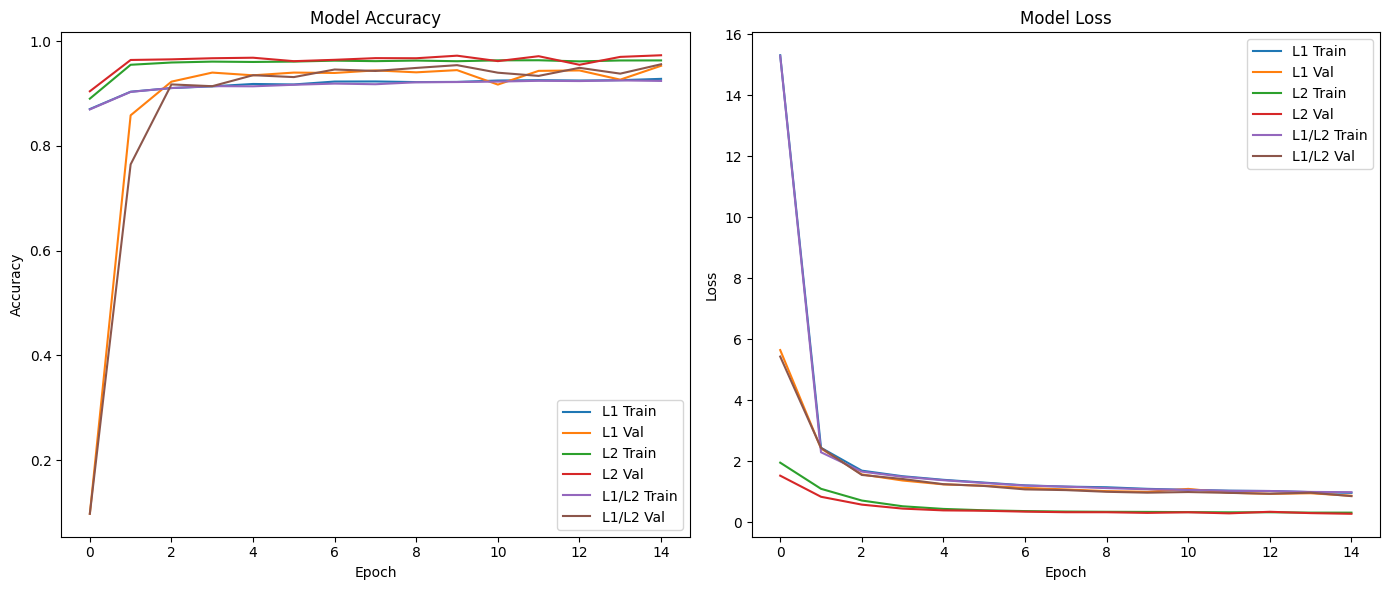

In [9]:
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='L1 Train')
plt.plot(history.history['val_accuracy'], label='L1 Val')
plt.plot(history2.history['accuracy'], label='L2 Train')
plt.plot(history2.history['val_accuracy'], label='L2 Val')
plt.plot(history3.history['accuracy'], label='L1/L2 Train')
plt.plot(history3.history['val_accuracy'], label='L1/L2 Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='L1 Train')
plt.plot(history.history['val_loss'], label='L1 Val')
plt.plot(history2.history['loss'], label='L2 Train')
plt.plot(history2.history['val_loss'], label='L2 Val')
plt.plot(history3.history['loss'], label='L1/L2 Train')
plt.plot(history3.history['val_loss'], label='L1/L2 Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


| **Metric**                | **Model 1 (L1)** | **Model 2 (L2)** | **Model 3 (L1 + L2)** |
| ------------------------- | ---------------- | ---------------- | --------------------- |
| **Regularization**        | L1               | L2               | L1 & L2 Combined      |
| **Final Training Loss**   | \~2.0            | \~1.2            | \~2.1                 |
| **Final Validation Loss** | \~1.8            | \~1.1            | \~1.9                 |
| **Test Accuracy**         | 95.31%           | 97.32%           | 95.60%                |


Detailed Observations


Model 1 – L1 Regularization
Test Accuracy: 95.31%

Shows slower convergence and slightly higher final loss.

Promotes sparsity, which may have reduced learning capacity in deeper layers.

Slight underfitting, with noticeable gap between training and validation accuracy early on.


Model 2 – L2 Regularization
Test Accuracy: 97.32% Best performer

Fast convergence, lowest training and validation loss among all models.

Stable learning throughout all epochs.

Ideal balance of bias and variance, best generalization.

Model 3 – L1 + L2 Regularization
Test Accuracy: 95.60%

Loss curve shows slow improvement and remains higher than L2.

Combined regularization may have led to over-regularization.

Performs better than L1-only but still not as effective as L2-only.